In [1]:
# Dependicies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.io import arff

### Loading iris data  and splitting it for testing and training

Setting test size to be one third of the total data

In [2]:
data = arff.loadarff('iris.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].apply(lambda x: x.decode('utf-8'))


x = df.loc[:,'sepallength':'petalwidth']
y = df['class'].astype('category').cat.codes

#splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.33, random_state=50)

Hierarchical Clustering examines the distance (one common measurement metric is euclidean distance) between every data point and clusters points based on their distance similarity.

The similarity method, or linkage, can be calculated in several ways. The following code implements five hierarchy's with different linage methods (single, complete, weighted, average, ward).

In [3]:
Zs = hierarchy.linkage(x_train, method='single')
Zcom = hierarchy.linkage(x_train, method='complete')
Zw = hierarchy.linkage(x_train, method='weighted')
Za = hierarchy.linkage(x_train, method='average')
Zward = hierarchy.linkage(x_train, method='ward')

Plotting these on dendograms gives us an idea on how to find a good number of clusters. Ideally we should be able to find a dendogram that branches out evenly. Good examples of this in the plots below are the 'complete linkage' and 'weighted linkage'.

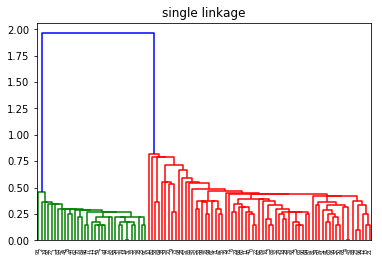

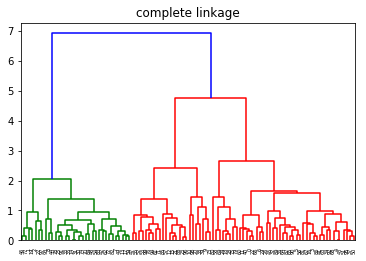

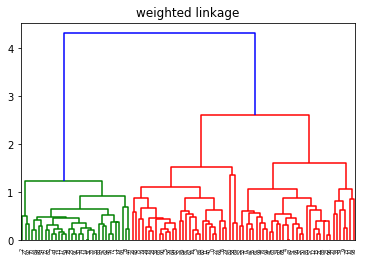

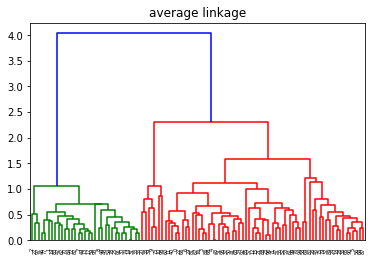

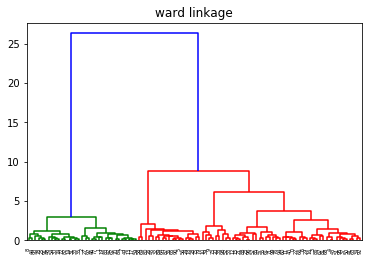

In [4]:
#linkage variables: single, complete, weighted, average, centroid, median, ward
plt.figure()
dn = hierarchy.dendrogram(Zs)
plt.title('single linkage')

plt.figure()
dn = hierarchy.dendrogram(Zcom)
plt.title('complete linkage')

plt.figure()
dn = hierarchy.dendrogram(Zw)
plt.title('weighted linkage')

plt.figure()
dn = hierarchy.dendrogram(Za)
plt.title('average linkage')

plt.figure()
dn = hierarchy.dendrogram(Zward)
plt.title('ward linkage')

plt.show()

A reasonable cluster size seems to be 3

In [5]:
# Creating hierarchy cluster algorithms with 3 clusters
s_clust = hierarchy.cut_tree(Zs, n_clusters=3)
com_clust = hierarchy.cut_tree(Zcom, n_clusters=3)
w_clust = hierarchy.cut_tree(Zw, n_clusters=3)
a_clust = hierarchy.cut_tree(Za, n_clusters=3)
ward_clust = hierarchy.cut_tree(Zward, n_clusters=3)

Looking at the confusion matrix for each clusterer

In [6]:
cm_s = confusion_matrix(y_train.T, s_clust)
cm_com = confusion_matrix(y_train.T, com_clust)
cm_w = confusion_matrix(y_train.T, w_clust)
cm_a = confusion_matrix(y_train.T, a_clust)
cm_ward = confusion_matrix(y_train.T, ward_clust)

In [7]:
print('Confusion Matrix for Hierarchical Clustering Algorithm where linkage=single')
print(cm_s)
print('Confusion Matrix for Hierarchical Clustering Algorithm where linkage=complete')
print(cm_com)
print('Confusion Matrix for Hierarchical Clustering Algorithm where linkage=weighted')
print(cm_w)
print('Confusion Matrix for Hierarchical Clustering Algorithm where linkage=average')
print(cm_a)
print('Confusion Matrix for Hierarchical Clustering Algorithm where linkage=ward')
print(cm_ward)

Confusion Matrix for Hierarchical Clustering Algorithm where linkage=single
[[ 0 33  0]
 [33  0  0]
 [33  0  1]]
Confusion Matrix for Hierarchical Clustering Algorithm where linkage=complete
[[ 0 33  0]
 [33  0  0]
 [10  0 24]]
Confusion Matrix for Hierarchical Clustering Algorithm where linkage=weighted
[[ 0 33  0]
 [31  0  2]
 [ 1  0 33]]
Confusion Matrix for Hierarchical Clustering Algorithm where linkage=average
[[ 0 33  0]
 [33  0  0]
 [27  0  7]]
Confusion Matrix for Hierarchical Clustering Algorithm where linkage=ward
[[ 0 33  0]
 [15  0 18]
 [33  0  1]]


#### The weighted linkage algorithm seems to seperate the data more effectively while single linkage seems to perform the worst due to placing almost all samples within 2 clusters

Clustering via Kmeans algorithm with 3 clusters

The number of clusters (K) in Kmeans represents the number of centroids to be assigned within the data. Data points are assigned to the centroid whose mean has the least squared euclidean distance.

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
k_pred = kmeans.predict(x_test)
cm_kmeans = confusion_matrix(y_test, k_pred)
print('Confusion Matrix for Kmeans at 3 clusters')
print(cm_kmeans)

Confusion Matrix for Kmeans at 3 clusters
[[17  0  0]
 [ 0  1 16]
 [ 0 12  4]]


#### Clusterer places all label 1 points in cluster 2, 16 label 2 points and 4 label 3 points in cluster 1, 1 label 2 point and 12 label 3 points in cluster 3 

In other words, cluster one corresponds to class 2, cluster two corresponds to class 1 and cluster 3 corresponds to class 3

### Below are som confusion matrices for larger numbers of cluters

In [9]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(x_train)
k_pred4 = kmeans4.predict(x_test)
cm_kmeans4 = confusion_matrix(y_test, k_pred4)
print('Confusion Matrix for Kmeans at 4 clusters')
print(cm_kmeans4)

Confusion Matrix for Kmeans at 4 clusters
[[ 0  0 17  0]
 [11  6  0  0]
 [ 0  9  0  7]
 [ 0  0  0  0]]


In [10]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x_train)
k_pred5 = kmeans5.predict(x_test)
cm_kmeans5 = confusion_matrix(y_test, k_pred5)
print('Confusion Matrix for Kmeans at 5 clusters')
print(cm_kmeans5)

Confusion Matrix for Kmeans at 5 clusters
[[ 0  0 17  0  0]
 [ 0  8  0  0  9]
 [ 5  3  0  8  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [11]:
kmeans6 = KMeans(n_clusters=6)
kmeans6.fit(x_train)
k_pred6 = kmeans6.predict(x_test)
cm_kmeans6 = confusion_matrix(y_test, k_pred6)
print('Confusion Matrix for Kmeans at 6 clusters')
print(cm_kmeans6)

Confusion Matrix for Kmeans at 6 clusters
[[8 0 0 9 0 0]
 [0 0 8 0 0 9]
 [0 8 3 0 5 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


There could be some argument of significance to kmeans with 4 clusters but it seems like kmeans was more efficient with 3 clusters.